In [27]:
import numpy as np
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import numpy as np
import sklearn.utils as su
import sklearn.ensemble as se
import sklearn.metrics as sm
import matplotlib.pyplot as mp

In [28]:
data = pd.DataFrame(pd.read_excel('数据.xlsx'))
data

,A15,A14,A16,A11,A12,A13,A2,A4,A5,A3,A17,A6,A1,A9,A10,A8,B1
0,4.593233,8.677823,1.659609,1.655181e+09,-4.555321e+08,-1.871641e+09,1.423137,0.211516,0.578760,3.184842e+10,4.278368e+10,1.802221e+10,0.145992,0.084764,0.022348,6.835781e+10,13802507.95
1,2.298318,9.523061,1.061854,8.661206e+08,-6.091957e+08,-7.675948e+08,1.062326,0.032922,0.805651,3.161661e+10,3.760385e+10,7.308258e+09,0.025763,0.035284,0.006281,4.105358e+10,9710441.40
2,5.259369,4.463272,0.939725,2.378817e+08,-1.497276e+08,-1.060152e+08,0.882502,0.122149,0.591833,1.694771e+09,3.816330e+09,1.557702e+09,0.054344,0.070276,0.031262,3.501669e+09,3739451.94
3,4.851287,1.801106,0.449781,4.082181e+08,-6.782769e+08,1.055808e+09,3.844574,1.378131,0.107236,2.469327e+09,7.087798e+09,6.327731e+09,0.877954,0.061877,0.198576,1.971734e+09,20539756.04
4,5.146917,9.094706,2.275403,3.260239e+08,-1.437081e+08,-4.170543e+07,1.390232,0.221321,0.712904,1.074189e+10,1.224533e+10,3.515582e+09,0.068888,0.112679,0.014819,2.673098e+10,3743814.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,4.015516,1.261441,0.683211,1.179389e+08,-8.966096e+07,7.059465e+08,4.347604,2.799681,0.225128,1.790907e+09,2.177739e+09,1.687469e+09,0.327479,0.058237,0.085876,1.144357e+09,4646505.63
400,6.144052,0.807578,0.465095,1.575639e+08,-3.009081e+08,3.302834e+08,3.827672,2.188851,0.183195,6.549910e+08,1.279531e+09,1.045128e+09,1.177376,0.179246,0.419708,4.463468e+08,31939649.57
401,2.842623,0.635438,0.292626,5.063762e+08,-3.065985e+09,4.346754e+09,26.979751,9.596773,0.045004,7.797522e+09,9.792731e+09,9.352016e+09,0.046336,0.095433,0.427429,2.088043e+09,31704338.50
402,14.953036,5.928768,1.186182,9.081232e+08,-5.999712e+08,8.132371e+08,6.401020,4.306622,0.132987,2.032710e+09,2.431509e+09,2.108149e+09,1.100920,0.396441,0.459693,1.818076e+09,7456000.02


In [35]:
data = data.dropna()
data.astype('float')
data


,A15,A14,A16,A11,A12,A13,A2,A4,A5,A3,A17,A6,A1,A9,A10,A8,B1
0,4.593233,8.677823,1.659609,1.655181e+09,-4.555321e+08,-1.871641e+09,1.423137,0.211516,0.578760,3.184842e+10,4.278368e+10,1.802221e+10,0.145992,0.084764,0.022348,6.835781e+10,13802507.95
1,2.298318,9.523061,1.061854,8.661206e+08,-6.091957e+08,-7.675948e+08,1.062326,0.032922,0.805651,3.161661e+10,3.760385e+10,7.308258e+09,0.025763,0.035284,0.006281,4.105358e+10,9710441.40
2,5.259369,4.463272,0.939725,2.378817e+08,-1.497276e+08,-1.060152e+08,0.882502,0.122149,0.591833,1.694771e+09,3.816330e+09,1.557702e+09,0.054344,0.070276,0.031262,3.501669e+09,3739451.94
3,4.851287,1.801106,0.449781,4.082181e+08,-6.782769e+08,1.055808e+09,3.844574,1.378131,0.107236,2.469327e+09,7.087798e+09,6.327731e+09,0.877954,0.061877,0.198576,1.971734e+09,20539756.04
4,5.146917,9.094706,2.275403,3.260239e+08,-1.437081e+08,-4.170543e+07,1.390232,0.221321,0.712904,1.074189e+10,1.224533e+10,3.515582e+09,0.068888,0.112679,0.014819,2.673098e+10,3743814.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,4.015516,1.261441,0.683211,1.179389e+08,-8.966096e+07,7.059465e+08,4.347604,2.799681,0.225128,1.790907e+09,2.177739e+09,1.687469e+09,0.327479,0.058237,0.085876,1.144357e+09,4646505.63
400,6.144052,0.807578,0.465095,1.575639e+08,-3.009081e+08,3.302834e+08,3.827672,2.188851,0.183195,6.549910e+08,1.279531e+09,1.045128e+09,1.177376,0.179246,0.419708,4.463468e+08,31939649.57
401,2.842623,0.635438,0.292626,5.063762e+08,-3.065985e+09,4.346754e+09,26.979751,9.596773,0.045004,7.797522e+09,9.792731e+09,9.352016e+09,0.046336,0.095433,0.427429,2.088043e+09,31704338.50
402,14.953036,5.928768,1.186182,9.081232e+08,-5.999712e+08,8.132371e+08,6.401020,4.306622,0.132987,2.032710e+09,2.431509e+09,2.108149e+09,1.100920,0.396441,0.459693,1.818076e+09,7456000.02


In [36]:
x = data.iloc[:,0:16]
y = data.iloc[:,-1]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 403
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A15     400 non-null    float64
 1   A14     400 non-null    float64
 2   A16     400 non-null    float64
 3   A11     400 non-null    float64
 4   A12     400 non-null    float64
 5   A13     400 non-null    float64
 6   A2      400 non-null    float64
 7   A4      400 non-null    float64
 8   A5      400 non-null    float64
 9   A3      400 non-null    float64
 10  A17     400 non-null    float64
 11  A6      400 non-null    float64
 12  A1      400 non-null    float64
 13  A9      400 non-null    float64
 14  A10     400 non-null    float64
 15  A8      400 non-null    float64
 16  B1      400 non-null    float64
dtypes: float64(17)
memory usage: 56.2 KB


In [37]:
total = data.isnull().sum().sort_values(ascending=False)
total

A15    0
A3     0
A8     0
A10    0
A9     0
A1     0
A6     0
A17    0
A5     0
A14    0
A4     0
A2     0
A13    0
A12    0
A11    0
A16    0
B1     0
dtype: int64

In [38]:
df_tmp1 = data[['A1','A2','A3','A4','A5','A6','A8','A9','A10','A11','A12','A13','A14','A15','A16','A17','B1']]
data = df_tmp1
data

,A1,A2,A3,A4,A5,A6,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,B1
0,0.145992,1.423137,3.184842e+10,0.211516,0.578760,1.802221e+10,6.835781e+10,0.084764,0.022348,1.655181e+09,-4.555321e+08,-1.871641e+09,8.677823,4.593233,1.659609,4.278368e+10,13802507.95
1,0.025763,1.062326,3.161661e+10,0.032922,0.805651,7.308258e+09,4.105358e+10,0.035284,0.006281,8.661206e+08,-6.091957e+08,-7.675948e+08,9.523061,2.298318,1.061854,3.760385e+10,9710441.40
2,0.054344,0.882502,1.694771e+09,0.122149,0.591833,1.557702e+09,3.501669e+09,0.070276,0.031262,2.378817e+08,-1.497276e+08,-1.060152e+08,4.463272,5.259369,0.939725,3.816330e+09,3739451.94
3,0.877954,3.844574,2.469327e+09,1.378131,0.107236,6.327731e+09,1.971734e+09,0.061877,0.198576,4.082181e+08,-6.782769e+08,1.055808e+09,1.801106,4.851287,0.449781,7.087798e+09,20539756.04
4,0.068888,1.390232,1.074189e+10,0.221321,0.712904,3.515582e+09,2.673098e+10,0.112679,0.014819,3.260239e+08,-1.437081e+08,-4.170543e+07,9.094706,5.146917,2.275403,1.224533e+10,3743814.36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399,0.327479,4.347604,1.790907e+09,2.799681,0.225128,1.687469e+09,1.144357e+09,0.058237,0.085876,1.179389e+08,-8.966096e+07,7.059465e+08,1.261441,4.015516,0.683211,2.177739e+09,4646505.63
400,1.177376,3.827672,6.549910e+08,2.188851,0.183195,1.045128e+09,4.463468e+08,0.179246,0.419708,1.575639e+08,-3.009081e+08,3.302834e+08,0.807578,6.144052,0.465095,1.279531e+09,31939649.57
401,0.046336,26.979751,7.797522e+09,9.596773,0.045004,9.352016e+09,2.088043e+09,0.095433,0.427429,5.063762e+08,-3.065985e+09,4.346754e+09,0.635438,2.842623,0.292626,9.792731e+09,31704338.50
402,1.100920,6.401020,2.032710e+09,4.306622,0.132987,2.108149e+09,1.818076e+09,0.396441,0.459693,9.081232e+08,-5.999712e+08,8.132371e+08,5.928768,14.953036,1.186182,2.431509e+09,7456000.02


In [40]:
x = data.drop(columns = ['B1'])
y = data['B1']
import sklearn.model_selection as ms

50 -> 0.905213218028792
100 -> 0.9022448388455027
150 -> 0.9109694077576285
200 -> 0.9053137263854201
250 -> 0.9124101234043129
300 -> 0.9063580372810741
350 -> 0.9018810796206906
400 -> 0.9113043941142888
450 -> 0.9075497486683811
500 -> 0.909117567816014
550 -> 0.9096431050801548
600 -> 0.9091507626382981
650 -> 0.9070756147027983
700 -> 0.9044522624101584
750 -> 0.9057347685597255
800 -> 0.9079979917023165
850 -> 0.9091133294167825
900 -> 0.9036886057353103
950 -> 0.9124640486472285
1000 -> 0.908357869499523
1050 -> 0.9049889357446301
1100 -> 0.9092337690515018
1150 -> 0.9081658706447078
1200 -> 0.9107280920637325
1250 -> 0.9053846444137067
1300 -> 0.9078787093984004
1350 -> 0.9089176779921828
1400 -> 0.9086278199899753
1450 -> 0.9055332409778624
1500 -> 0.9082193461309666


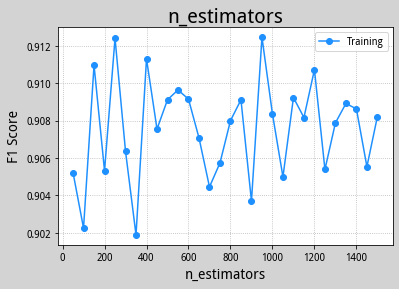

In [42]:
i = []
score = []
for n_estimators in range(50, 1550, 50):
    model = RandomForestRegressor(
                n_estimators = n_estimators,
                max_depth = 10,
                min_samples_split = 2)
    model.fit(x,y)
    y_test_pred = model.predict(x)
    train_means1 = sm.r2_score(y, y_test_pred)
    print(n_estimators, '->', train_means1)
    i.append(n_estimators)
    score.append(train_means1)

mp.figure('n_estimators', facecolor='lightgray')
mp.title('n_estimators', fontsize=20)
mp.xlabel('n_estimators', fontsize=14)
mp.ylabel('F1 Score', fontsize=14)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.plot(i, score, 'o-', c='dodgerblue', label='Training')
mp.legend()
mp.show()

5 -> 0.8766943614152327
6 -> 0.890227830685152
7 -> 0.9018484621445774
8 -> 0.9044893175371108
9 -> 0.9081394562401515
10 -> 0.9027621041336249
11 -> 0.906887662246975
12 -> 0.9091915842984939
13 -> 0.9073552215127986
14 -> 0.9104910805557103
15 -> 0.9087540587069303
16 -> 0.907964618183696
17 -> 0.9061670326360909
18 -> 0.9033209878018372
19 -> 0.9054729585786011


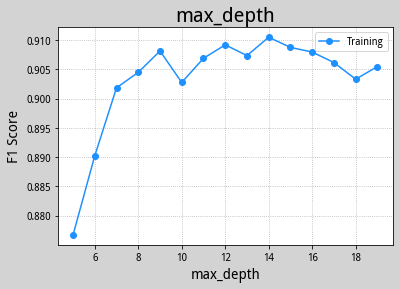

In [43]:
i = []
score = []
for max_depth in range(5, 20, 1):
    model = RandomForestRegressor(
                n_estimators = 650,
                max_depth = max_depth,
                min_samples_split = 2)
    model.fit(x,y)
    y_test_pred = model.predict(x)
    train_means1 = sm.r2_score(y, y_test_pred)
    print(max_depth, '->', train_means1)
    i.append(max_depth)
    score.append(train_means1)

mp.figure('max_depth', facecolor='lightgray')
mp.title('max_depth', fontsize=20)
mp.xlabel('max_depth', fontsize=14)
mp.ylabel('F1 Score', fontsize=14)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.plot(i, score, 'o-', c='dodgerblue', label='Training')
mp.legend()
mp.show()

20 -> 0.6759857151396627
19 -> 0.6774207671585787
18 -> 0.6798231978686746
17 -> 0.6853090991216855
16 -> 0.678424104131163
15 -> 0.6853682063373909
14 -> 0.683181828757087
13 -> 0.6946633667851032
12 -> 0.6965770482959635
11 -> 0.7106811235409844
10 -> 0.7249132018997269
9 -> 0.7642242033924694
8 -> 0.7972881205160065
7 -> 0.8186156827838617
6 -> 0.8426306226190836
5 -> 0.8710494031270608
4 -> 0.8792066083599326
3 -> 0.8935310189425181
2 -> 0.9093106726172291


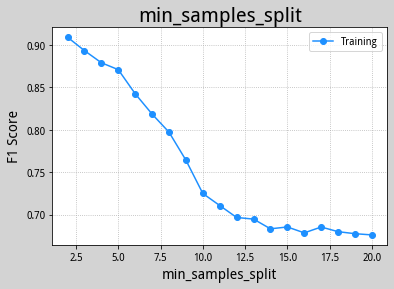

In [58]:
i = []
score = []
for min_samples_split in range(20, 1, -1):
    model = RandomForestRegressor(
                n_estimators = 550,
                max_depth = 15,
                min_samples_split = min_samples_split)
    model.fit(x,y)
    y_test_pred = model.predict(x)
    train_means1 = sm.r2_score(y, y_test_pred)
    print(min_samples_split, '->', train_means1)
    i.append(min_samples_split)
    score.append(train_means1)

mp.figure('min_samples_split', facecolor='lightgray')
mp.title('min_samples_split', fontsize=20)
mp.xlabel('min_samples_split', fontsize=14)
mp.ylabel('F1 Score', fontsize=14)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.plot(i, score, 'o-', c='dodgerblue', label='Training')
mp.legend()
mp.show()

1 -> 0.91305109204895
2 -> 0.8361533257372773
3 -> 0.7566285653831535
4 -> 0.6783118161296078
5 -> 0.6265534521859193
6 -> 0.585420563998815
7 -> 0.5684839237089915
8 -> 0.5552608857877133
9 -> 0.5376550276126197
10 -> 0.5236038859909677
11 -> 0.50715902251773
12 -> 0.48736708569385945
13 -> 0.47066319642081933
14 -> 0.4501954132814131
15 -> 0.4248080324511042
16 -> 0.39948302610350905
17 -> 0.38074741602718787
18 -> 0.36589594513674106
19 -> 0.3564913624659828


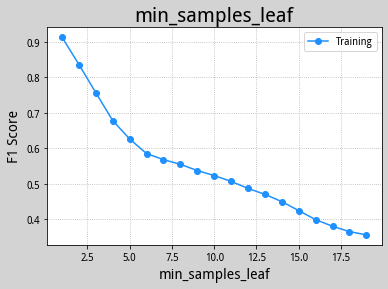

In [60]:
i = []
score = []
for min_samples_leaf in range(1, 20, 1):
    model = RandomForestRegressor(
                n_estimators = 550,
                max_depth = 15,
                min_samples_split =2,
                min_samples_leaf = min_samples_leaf)
    model.fit(x,y)
    y_test_pred = model.predict(x)
    train_means1 = sm.r2_score(y, y_test_pred)
    print(min_samples_leaf, '->', train_means1)
    i.append(min_samples_leaf)
    score.append(train_means1)

mp.figure('min_samples_leaf', facecolor='lightgray')
mp.title('min_samples_leaf', fontsize=20)
mp.xlabel('min_samples_leaf', fontsize=14)
mp.ylabel('F1 Score', fontsize=14)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.plot(i, score, 'o-', c='dodgerblue', label='Training')
mp.legend()
mp.show()

In [44]:
model = RandomForestRegressor(
                n_estimators = 550,
                max_depth = 15,
                min_samples_split = 2)
model.fit(x,y)
y_test_pred = model.predict(x)
print(sm.r2_score(y, y_test_pred))


0.9092503366008708


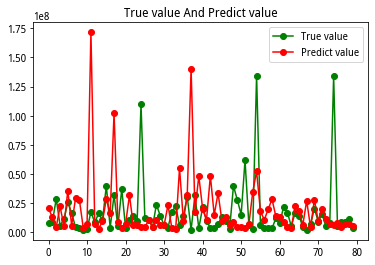

In [47]:
plt.figure()
plt.plot(np.arange(80), y_test[:80], "go-", label="True value")
plt.plot(np.arange(80), y_test_pred[:80], "ro-", label="Predict value")
plt.title("True value And Predict value")
plt.legend()


In [48]:
# Get numerical feature importances
importances = list(model.feature_importances_)
print(importances)

# Saving feature names for later use
feature_list = list(data.columns)[0:16]

feature_importances = [(feature, round(importance, 3)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

# Print out the feature and importances 
print(feature_importances)


[0.03830989330688346, 0.013285510516959703, 0.02095299744294881, 0.015467365812323596, 0.01655870168658748, 0.12589992934072305, 0.011997592782012904, 0.05399663936481862, 0.021162844110116447, 0.452462335318468, 0.05326033667346206, 0.05563291284246587, 0.055678613460820404, 0.02378506129378909, 0.02678183117059433, 0.014767434877026081]
[('A11', 0.452), ('A6', 0.126), ('A13', 0.056), ('A14', 0.056), ('A9', 0.054), ('A12', 0.053), ('A1', 0.038), ('A16', 0.027), ('A15', 0.024), ('A3', 0.021), ('A10', 0.021), ('A5', 0.017), ('A4', 0.015), ('A17', 0.015), ('A2', 0.013), ('A8', 0.012)]


[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]


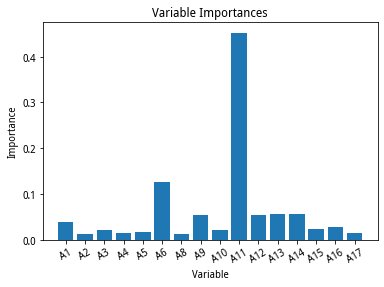

In [49]:

import matplotlib.pyplot as plt
# Set the style
# plt.style.use('fivethirtyeight')
# list of x locations for plotting
x_values = list(range(len(importances)))
print(x_values)
# Make a bar chart
plt.bar(x_values, importances, orientation = 'vertical')
# Tick labels for x axis
plt.xticks(x_values, feature_list,rotation=30)
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');
plt.show()


In [50]:
target = [0.2530,3.72,14041000000,1.95,0.2345,17237000000,10747000000,0.2578,0.3627,3331000000,-2426000000,807000000,0.36,7.74,0.55,22516000000]
target= np.asarray(target).reshape(1, -1)
target

array([[ 2.5300e-01,  3.7200e+00,  1.4041e+10,  1.9500e+00,  2.3450e-01,
         1.7237e+10,  1.0747e+10,  2.5780e-01,  3.6270e-01,  3.3310e+09,
        -2.4260e+09,  8.0700e+08,  3.6000e-01,  7.7400e+00,  5.5000e-01,
         2.2516e+10]])

In [51]:
model.predict(target)

array([1.24665244e+08])

In [52]:
#139185800000